## Material Science deep learning project)


In [33]:
import numpy as np
import pandas as pd

#read file
df = pd.read_csv("MStestD.csv",encoding ="ansi", skip_blank_lines = True)
print(df.head())
print(df.shape)

   Unnamed: 0   CaO  Al2O3  SiO2   Si    Al    Ca     O     D
0           0  61.0   29.0  10.0  202  1172  1232  3394  2.92
1           1  53.0   37.0  10.0  187  1382   991  3438  2.90
2           2  45.0   45.0  10.0  174  1564   783  3477  2.87
3           3  40.0   50.0  10.0  167  1666   667  3500  2.78
4           4  35.0   55.0  10.0  160  1760   560  3520  2.98
(103, 9)


X would be the first three columns
Y would be the properties that the model will predict

In [3]:
#normalize the data
#df_x = df.iloc[:, 1:4]/100
df_x = df.iloc[:, 0:3]
print(df_x )

def min_max_norm(column):
    minimum = min(column)
    maximum = max(column)
    norm_column = (column - minimum)/(maximum - minimum)
    return norm_column

df_y = df.iloc[:, 8]
print(df_y)
df_y = min_max_norm(df_y).astype(float).round(6)

print(df_y)


     Unnamed: 0   CaO  Al2O3
0             0  61.0   29.0
1             1  53.0   37.0
2             2  45.0   45.0
3             3  40.0   50.0
4             4  35.0   55.0
..          ...   ...    ...
98           98  26.4   10.0
99           99  24.1    9.3
100         100  26.2    9.0
101         101  26.1    8.5
102         102  25.2    9.5

[103 rows x 3 columns]
0      2.920
1      2.900
2      2.870
3      2.780
4      2.980
       ...  
98     2.642
99     2.599
100    2.626
101    2.621
102    2.616
Name: D, Length: 103, dtype: float64
0      0.900000
1      0.866667
2      0.816667
3      0.666667
4      1.000000
         ...   
98     0.436667
99     0.365000
100    0.410000
101    0.401667
102    0.393333
Name: D, Length: 103, dtype: float64


In [4]:
#PCA, needed here? These are the parameters for the X

from sklearn import decomposition

pca_data = df_x

NUMBER_OF_COMPONENTS = 2
pca = decomposition.PCA(n_components = NUMBER_OF_COMPONENTS)
pca.fit(pca_data)
transform_X = pca.transform(pca_data)
print("Overall")
print(pca.explained_variance_ratio_)

for components in range(NUMBER_OF_COMPONENTS):
    comp = pca.components_[components]
    print("Component %i explains ratio %.6f" % ((components + 1),pca.explained_variance_ratio_[components]) )
    sorted_index = np.argsort(comp)
    for i in reversed(range(len(sorted_index))):
        print("%.6f\t%s" % (comp[sorted_index[i]], pca_data.columns[sorted_index[i]]))
    print("")
    

Overall
[0.8608801  0.09306221]
Component 1 explains ratio 0.860880
0.222803	CaO
0.168385	Al2O3
-0.960211	Unnamed: 0

Component 2 explains ratio 0.093062
0.815886	Al2O3
0.008926	Unnamed: 0
-0.578144	CaO



     Unnamed: 0   CaO  Al2O3         D
0             0  61.0   29.0  0.900000
1             1  53.0   37.0  0.866667
2             2  45.0   45.0  0.816667
3             3  40.0   50.0  0.666667
4             4  35.0   55.0  1.000000
..          ...   ...    ...       ...
98           98  26.4   10.0  0.436667
99           99  24.1    9.3  0.365000
100         100  26.2    9.0  0.410000
101         101  26.1    8.5  0.401667
102         102  25.2    9.5  0.393333

[103 rows x 4 columns]
            Unnamed: 0       CaO     Al2O3         D
Unnamed: 0    1.000000 -0.611466 -0.464310 -0.698837
CaO          -0.611466  1.000000  0.082872  0.900889
Al2O3        -0.464310  0.082872  1.000000  0.367086
D            -0.698837  0.900889  0.367086  1.000000


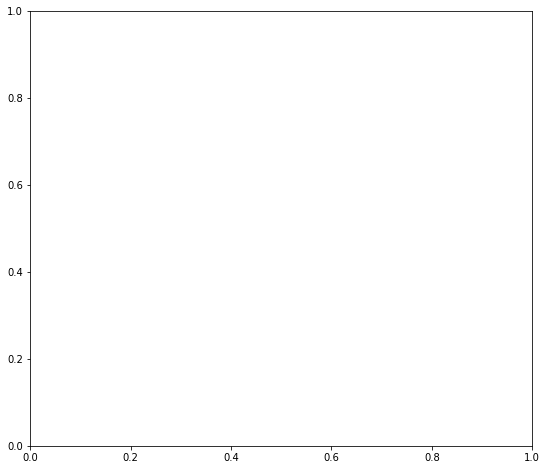

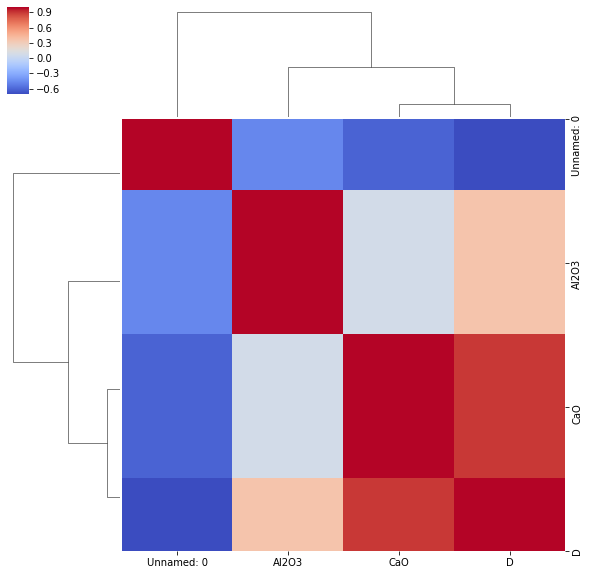

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


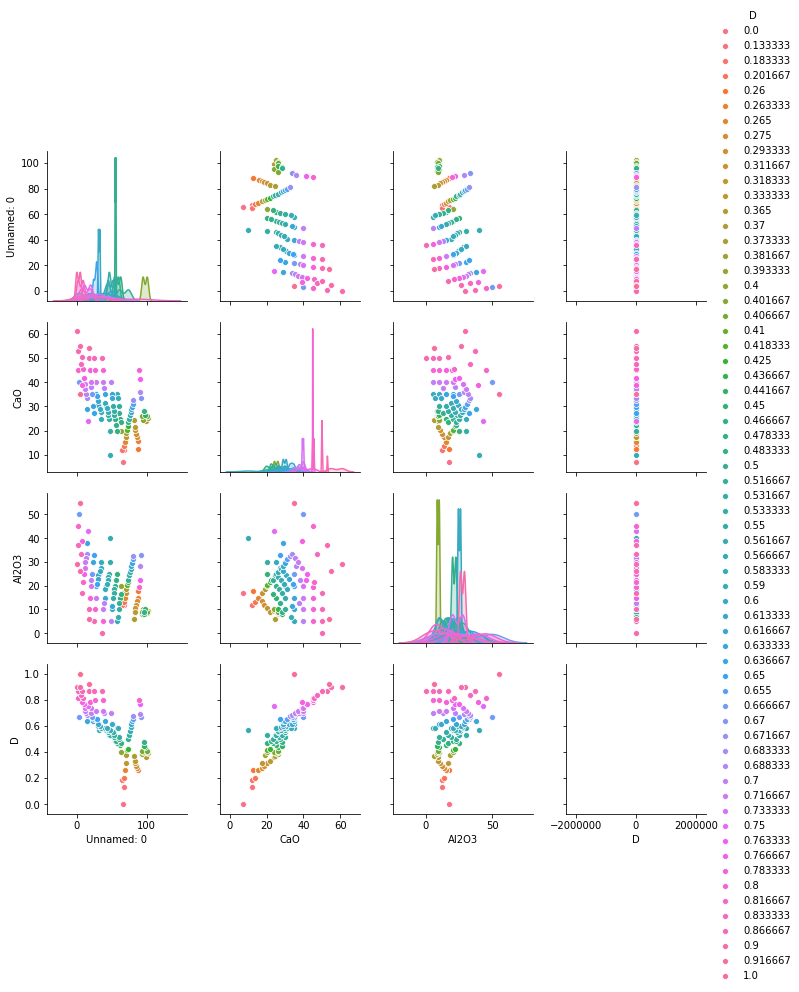

<Figure size 432x288 with 0 Axes>

In [5]:
#Correlation
#correlation heatmap
#print(df_cor)
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df_x.join(df_y)
print(df_corr)
corr = df_corr.corr(method = 'pearson')
print(corr)
f, ax = plt.subplots(figsize =(9, 8)) 
#sns.heatmap(corr, ax = ax, center = 0.0,cmap = 'coolwarm',square = True)
sns.clustermap(corr, cmap='coolwarm')
plt.show()

sns.pairplot(df_corr, hue = 'D')
plt.show()
plt.savefig('correlogram_colored.png')

In [7]:
#feature importance
def x_y_split(dataset, data_start, data_end, target_index):
    x_data = dataset[:, data_start:data_end+1]
    y_data = dataset[:, target_index]
    return x_data, y_data

X, Y = x_y_split(df.to_numpy(), 0, 2, 7)
#print(X)
#print(Y)

Using the GridSearchCV to find the best parameter
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
[0.55539514 0.32201455 0.12259032]
Al2O3         0.122590
CaO           0.322015
Unnamed: 0    0.555395
dtype: float64


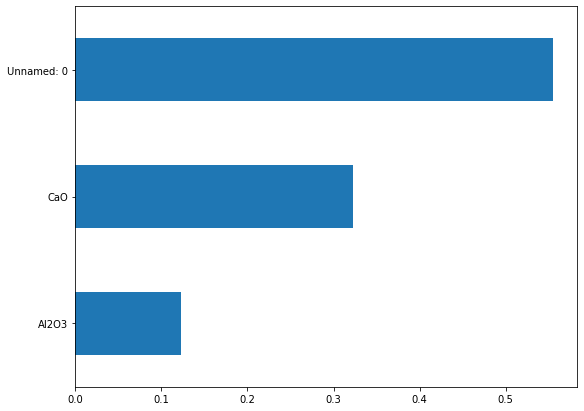

In [8]:
#feature importance
def random_forest_n_runs_feat_importance(x_data, y_data, forest_model, runs, features):
    feature_importance_array = []
    
    for i in range(features):
        feature_importance_array.append(np.zeros(runs))
    
    for run in range(0, runs):
        forest_model.fit(x_data, y_data)
        importances = forest_model.feature_importances_
        for k in range(features):
            feature_importance_array[k][run] = importances[k]
        #print(importances)
    #print(feature_importance_array)
    return feature_importance_array

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneGroupOut, LeavePGroupsOut, GridSearchCV, RandomizedSearchCV

#random forest optimization
print("Using the GridSearchCV to find the best parameter")

parameters = {'n_estimators':[100+10*n for n in range(1,10)],
            'criterion':['mse', 'mae'], 
            'min_samples_split':[i for i in range(2, 10)]}

RF = RandomForestRegressor()
clf_RF = GridSearchCV(RF, parameters, cv=5)

results_RF = clf_RF.fit(X, Y)
print(results_RF.best_estimator_)

NUMBER_OF_RUNS = 20
FEATURES = 3

feat_importance = random_forest_n_runs_feat_importance(X, Y, results_RF.best_estimator_, NUMBER_OF_RUNS, FEATURES )
avg_feat_importance = np.zeros(FEATURES)
for f in range(len(feat_importance)):
    avg_feat_importance[f]= feat_importance[f].mean()

print(avg_feat_importance)
feat_importance = pd.Series(avg_feat_importance, index = df_x.columns).sort_values()
print(feat_importance)
plt.figure(figsize=(9,7))
feat_importance.plot(kind='barh')
plt.show()

Using the GridSearchCV to find the best parameter
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
[0.0894619  0.81298297 0.09755513]
Unnamed: 0    0.089462
Al2O3         0.097555
CaO           0.812983
dtype: float64


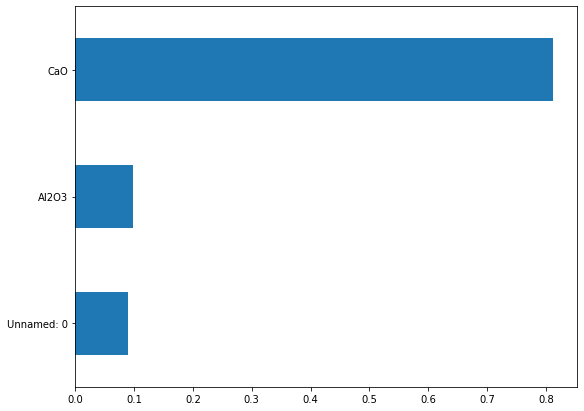

In [32]:
#random forest optimization
#using normalized values
print("Using the GridSearchCV to find the best parameter")

parameters = {'n_estimators':[100+10*n for n in range(1,10)],
            'criterion':['mse', 'mae'], 
            'min_samples_split':[i for i in range(2, 10)]}

X_n = df_x.to_numpy()
Y_n = df_y.to_numpy()

RF = RandomForestRegressor()
clf_RF = GridSearchCV(RF, parameters, cv=5)

results_RF = clf_RF.fit(X_n, Y_n)
print(results_RF.best_estimator_)

feat_importance = random_forest_n_runs_feat_importance(X_n, Y_n, results_RF.best_estimator_, NUMBER_OF_RUNS, FEATURES )
avg_feat_importance = np.zeros(FEATURES)
for f in range(len(feat_importance)):
    avg_feat_importance[f]= feat_importance[f].mean()

print(avg_feat_importance)
feat_importance = pd.Series(avg_feat_importance, index = df_x.columns).sort_values()
print(feat_importance)
plt.figure(figsize=(9,7))
feat_importance.plot(kind='barh')
plt.show()

In [9]:
#train test split
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 50)

#print(X_train)

def nested_cv(model_data, X_data, Y_data):
    kf = KFold(n_splits = 5, random_state = 50, shuffle = True)

    #use mse for regressor scoring
    #use rmse
    best_score = 10000;
    #use r2 for scoring (closer to 1 is better)
    #best_score = -10000
    
    #outer split
    for train_index, test_index in kf.split(X_data):
        X_train, X_test = X_data[train_index], X_data[test_index]
        Y_train, Y_test = Y_data[train_index], Y_data[test_index]
        
        #inner split
        optimal_cv_model, cv_results = inner_cv(model_data, X_train, Y_train)
        #print(optimal_cv_model)
        #refit the model on the training data
        optimal_cv_model.fit(X_train, Y_train)
        
        #test on hold-out data
        Y_pred = optimal_cv_model.predict(X_test)
        
        nested_score = rsme(Y_test, Y_pred)
        #nested_score = metrics.r2_score(Y_test, Y_pred)
        print(nested_score)
        
        if best_score > nested_score:
        #if best_score < nested_score:
            best_score = nested_score
            optimal_model = optimal_cv_model
            best_cv_results = cv_results
        
    return optimal_model, best_cv_results
        
def inner_cv(model_data, X, Y):
    print("Inner Cross Validation")
    model, params = model_data
    #test_model = GridSearchCV(model, params, scoring = 'r2', cv = 5).fit(X, Y)
    #use mse scoring metric
    test_model = GridSearchCV(model, params, scoring = 'neg_mean_squared_error', cv = 5).fit(X, Y)
    #print(test_model.best_estimator_)
    #print(test_model.scorer_)
    return test_model.best_estimator_, test_model.cv_results_

def rsme(predictions, target):
    #root squared mean error
    return np.sqrt(((predictions - target) **2).mean())

import warnings
warnings.filterwarnings('ignore')
# to filter out warnings at this time

In [10]:
print("Random Forest Regressor")
RF = RandomForestRegressor()
parameters = {'n_estimators':[100+10*n for n in range(1,10)],
            'criterion':['mse', 'mae'], 
            'min_samples_split':[i for i in range(2, 10)]}
model_data = RF, parameters
best_rf_model, best_rf_cv = nested_cv(model_data, X, Y)

print(best_rf_model)

Random Forest Regressor
Inner Cross Validation
10.113597995668467
Inner Cross Validation
8.933971488696741
Inner Cross Validation
18.183050523987646
Inner Cross Validation
28.573961177905442
Inner Cross Validation
22.34938516740696
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [18]:
print("Lasso")
#set up a different variable because the optimal alpha is different for lasso and ridge
#alphas_lasso = [pow(10, i/10)for i in range (-100, 100)]
alphas_lasso = np.logspace(-4, 2, 30)
from sklearn.linear_model import Lasso
params_lasso = {'alpha':alphas_lasso
               }
model_data = Lasso(), params_lasso
best_lasso_model, best_lasso_cv = nested_cv(model_data, X, Y)
print(best_lasso_model)


Lasso
Inner Cross Validation
13.324609469799304
Inner Cross Validation
12.555123521806918
Inner Cross Validation
35.59601215440791
Inner Cross Validation
27.84531572683284
Inner Cross Validation
9.955546736682441
Lasso(alpha=1.3738237958832638, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [28]:
print("Ridge")
from sklearn.linear_model import Ridge
#set up a different variable because the optimal alpha is different for lasso and ridge
#alphas_ridge = [pow(10, i/10)for i in range (-100, 100)]
alphas_ridge = np.logspace(2, 4, 30)
params = {'solver':['auto'],
         'alpha':alphas_ridge}
model_data = Ridge(), params
best_ridge_model, best_ridge_cv = nested_cv(model_data, X, Y)
print(best_ridge_model)

Ridge
Inner Cross Validation
14.626811042494516
Inner Cross Validation
13.875621637537451
Inner Cross Validation
34.41599192517337
Inner Cross Validation
29.177367299270287
Inner Cross Validation
12.018902600952341
Ridge(alpha=303.9195382313198, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [29]:
best_lasso_model.fit(X, Y)
Y_pred = best_lasso_model.predict(X)
print(best_lasso_model.score(X, Y))

best_ridge_model.fit(X, Y)
Y_pred = best_ridge_model.predict(X)
print(best_ridge_model.score(X, Y))

0.9541854449908096
0.9533809377392212


(0.0001, 100.0)

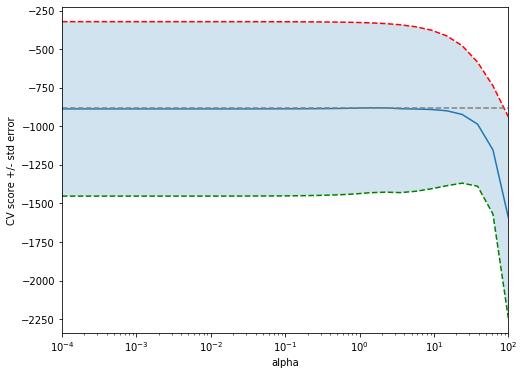

In [30]:
#plots the CV-results with respect to it parameters

scores = best_lasso_cv['mean_test_score']
scores_std = best_lasso_cv['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas_lasso, scores)

std_error = scores_std / np.sqrt(4)

plt.semilogx(alphas_lasso, scores + std_error, 'b--',c='r' )
plt.semilogx(alphas_lasso, scores - std_error, 'b--',c='g')

plt.fill_between(alphas_lasso, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.xlim([alphas_lasso[0], alphas_lasso[-1]])


(100.0, 10000.0)

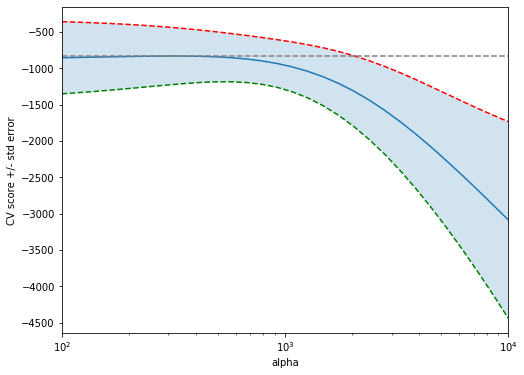

In [31]:
#plots the CV-results with respect to it parameters
scores = best_ridge_cv['mean_test_score']
scores_std = best_ridge_cv['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas_ridge, scores)

std_error = scores_std / np.sqrt(4)

plt.semilogx(alphas_ridge, scores + std_error, 'b--',c='r' )
plt.semilogx(alphas_ridge, scores - std_error, 'b--',c='g')

plt.fill_between(alphas_ridge, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.xlim([alphas_ridge[0], alphas_ridge[-1]])


Random Forest Regressor - by number of trees
Inner Cross Validation
0.023204363792415427
Inner Cross Validation
0.02542432955523753
Inner Cross Validation
0.013058555928452072
Inner Cross Validation
0.03311642704157594
Inner Cross Validation
0.043858116484624454
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


(50, 340)

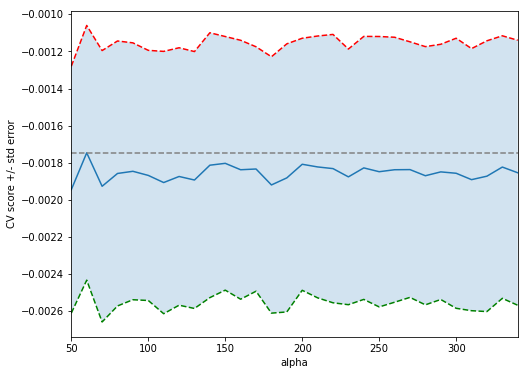

In [25]:
#can't really do a plot with random forest because there are more parameters than just the number of trees
print("Random Forest Regressor - by number of trees")
RF2 = RandomForestRegressor()
trees = [n for n in range(50,350,10)]
parameters = {'n_estimators':trees,
            'criterion':['mae'], 
            'min_samples_split':[3]}
model_data = RF2, parameters
best_rf2_model, best_rf2_cv = nested_cv(model_data, X, Y)

print(best_rf2_model)

#plots the CV-results with respect to it parameters
scores = best_rf2_cv['mean_test_score']
scores_std = best_rf2_cv['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.plot(trees, scores)

std_error = scores_std / np.sqrt(4)

plt.plot(trees, scores + std_error, 'b--',c='r' )
plt.plot(trees, scores - std_error, 'b--',c='g')

plt.fill_between(trees, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.xlim([trees[0], trees[-1]])

In [ ]:
#print(best_rf2_cv)

In [ ]:
#add a graph to plot number of samples with R2 score
sample_size = [i*5 for i in range(2, 20)]
#print(sample_size)
sample_size_result = []
#for each sample size, build model and record performance
#select 10 samples as holdout for testing
sample_x,  holdout_x, sample_y, holdout_y = train_test_split(X, Y, test_size = 10, shuffle = True, random_state = 50) 
print(sample_x.shape)
print(holdout_x.shape)
for s in sample_size:
    if s > np.size(sample_x, 0):
        print("Sample size %d is greater than data size %d. Not splitting" % (s, np.size(sample_x, 0)))
        s = np.size(sample_x, 0)      
        s_X = sample_x
        s_Y = sample_y
    else:
        #sample from the test set
        s_X, dis_X, s_Y, dis_Y = train_test_split(sample_x, sample_y, train_size = s, shuffle = True, random_state = 50)
    print("Sample size:", s)
    #print(s_X.shape)
    #perform nested cross validation on sample
    n_RF = RandomForestRegressor()
    parameters = {'n_estimators':trees,
            'criterion':['mae'], 
            'min_samples_split':[3]}
    model_data = n_RF, parameters
    best_n_rf_model, best_n_rf_cv = nested_cv(model_data, s_X, s_Y)

    print(best_n_rf_model)
    best_n_rf_model.fit(s_X, s_Y)
    s_Y_pred = best_n_rf_model.predict(holdout_x)
    #r2_score = metrics.r2_score(holdout_y, s_Y_pred)
    #sample_size_result.append([s, r2_score])
    #score = metrics.mean_squared_error(holdout_y, s_Y_pred)
    score = rsme(holdout_y, s_Y_pred)
    sample_size_result.append([s, score])
    
print(sample_size_result)

    

(93, 3)
(10, 3)
Sample size: 10
Inner Cross Validation
0.08442972745159719
Inner Cross Validation
0.05139385839334797
Inner Cross Validation
0.0392904688681317
Inner Cross Validation
0.027871952082525697
Inner Cross Validation
0.017408124899022468
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Sample size: 15
Inner Cross Validation
0.07111314356181048
Inner Cross Validation
0.030050224372682004
Inner Cross Validation
0.05273557152544483
Inner Cross Validation
0.029169246933486676
Inner Cross Validation
0.025309178479479107
RandomForestRegressor(bootstrap=True, criterion='mae', 

0.014167274620338021
Inner Cross Validation
0.06015270600847265
Inner Cross Validation
0.013721577435476771
Inner Cross Validation
0.027956071705011923
Inner Cross Validation
0.01662436751604519
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Sample size: 75
Inner Cross Validation
0.024433933638148154
Inner Cross Validation
0.009782115227972503
Inner Cross Validation
0.03551112974666409
Inner Cross Validation
0.024679173654453972
Inner Cross Validation
0.05332094124697232
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='a

In [ ]:
#print(sample_size_result)
size = []
score = []
for i in range(len(sample_size_result)):
    #print(sample_size_result[i])
    #print(sample_size_result[i][0])
    size.append(sample_size_result[i][0])
    score.append(sample_size_result[i][1])
    #print(sample_size[i])
print(size)
print(score)

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Number of training data')
#(ax.set_ylabel('R^2 score on test data'))
ax.set_ylabel('RMSE score on test data')
ax.plot(size, score)
fig.show()